<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/Lab3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab 3 - 1/31/25

Agenda:

1. Cover any questions after Project 1.
2. Determining k
3. 1.4 High Dimensionaliry Numerical Corner

  a. Code Overview

  b. Curse of Dimensionality

  c. Visual Proof of Chebyshev’s Inequality

4. Functions


# Determining k


In K-means clustering, one of the main challenges is determining the optimal number of clusters (k). In most real-world applications, (k) is not known in advance (usually either because of complex/high dimensional data or just not knowing the ground truth), and selecting an inappropriate value can lead to poor clustering results.

There are many ways to determine the best k - common ones are:
- Elbow methow
- Silhouette score
- Domain knowldege


# 1.4 Numerical Corner

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn as sns

In [2]:
# Functions we have seen before - K Means

# our k-means functions are out_reps, opt_clust, and kmeans
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

def kmeans(rng, X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        reps = opt_reps(X, k, assign)
        assign = opt_clust(X, k, reps)
    return assign

In [3]:
# New Functions for Section 1.2.3

# (Section 1.2.3) A function to sample form a spherical gaussian distribution
def spherical_gaussian(rng, d, n, mu, sig):
    return mu + sig * rng.normal(0,1,(n,d))

# (Section 1.2.3) The code computes mixtures of spherical Gaussians, a special case of the Gaussian Mixture Model (GMM)
# It returns an d by n array X, where each row is a sample from a 2-component spherical Gaussian mixture.
def gmm2spherical(rng, d, n, phi0, phi1, mu0, sig0, mu1, sig1):

    phi, mu, sig = np.stack((phi0, phi1)), np.stack((mu0, mu1)), np.stack((sig0,sig1))

    X = np.zeros((n,d))
    component = rng.choice(2, size=n, p=phi)
    for i in range(n):
        X[i,:] = spherical_gaussian(rng, d, 1, mu[component[i],:], sig[component[i]])

    return X

In [4]:
# New Function from Section 1.4.1
def two_mixed_clusters(rng, d, n, w):
    mu0 = np.hstack(([w], np.zeros(d-1)))
    mu1 = np.hstack(([-w], np.zeros(d-1)))
    return gmm2spherical(rng, d, n, 0.5, 0.5, mu0, 1, mu1, 1)

In [5]:
# Set seed and Initialize Random Number Generator
seed = 535
rng = np.random.default_rng(seed)

In [6]:
# Start with d = 2 (2 dimensions)
d, n, w = 2, 100, 3.
X = two_mixed_clusters(rng, d, n, w)

#### **Question:** Please explain what d, n, and w are?

**Answer**: d is the number of dimensions- the number of features in the data set ; n is the total number of data points generated ; w determines seperation between two cluster centers

In [7]:
# Try kmeans with k = 2
assign = kmeans(rng, X, 2)

1044.8267883490312
208.52841662854883
204.02397716710018
204.02397716710018
204.02397716710018
204.02397716710018
204.02397716710018
204.02397716710018
204.02397716710018
204.02397716710018


#### **Question:** Please explain what the output from the above code chunk is/means?

**Answer:** it is printing out the G value - the overall cost sum of the distances between each point and their assigned cluster

Our default of 10 iterations seem to have been enough for the algorithm to converge (note that the default of maxiter is 10 in the above code).

In [ ]:
X.shape

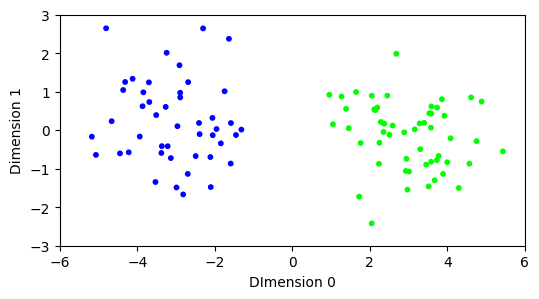

In [8]:
# Visualize the result by coloring the points according to the assignment. (d = 2)
i = 0
j = 1
plt.figure(figsize=(6,3))
plt.scatter(X[:,i], X[:,j], s=10, c=assign, cmap='brg')
plt.axis([-6,6,-3,3])
plt.ylabel(f'Dimension {j}')
plt.xlabel(f'DImension {i}')
plt.show()

We see 2 clearly distinguishable clusters

*Next, let's create a d = 1000 dimensional data set instead of just d = 2.*

In [9]:
# Using d = 1000, plot the data in the first 2 dimensions with means centered at 3 and -3
d, n, w = 1000, 100, 3.
X = two_mixed_clusters(rng, d, n, w)

X.shape

(100, 1000)

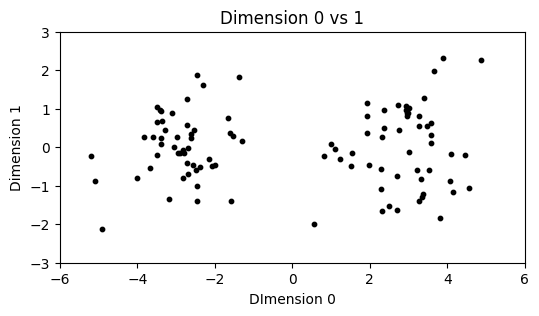

In [10]:
i = 0
j = 1
plt.figure(figsize=(6,3))
plt.scatter(X[:,i], X[:,j], s=10, c='k')
plt.axis([-6,6,-3,3])
plt.ylabel(f'Dimension {j}')
plt.xlabel(f'DImension {i}')
plt.title(f'Dimension {i} vs {j}')

plt.show()

We once again see two clearly distinguishable clusters.

*Now, let's plot first and second dimension.*

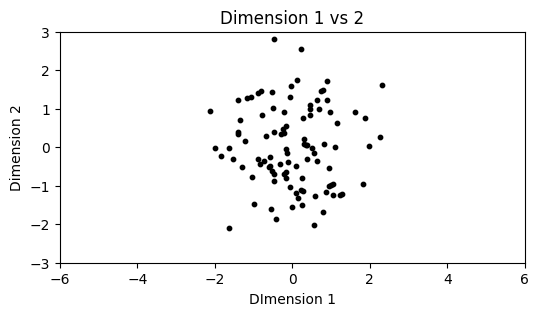

In [11]:
#If we plot in any two dimensions not including the first one instead, we see only one cluster.
i = 1
j = 2
plt.figure(figsize=(6,3))
plt.scatter(X[:,i], X[:,j], s=10, c='k')
plt.axis([-6,6,-3,3])
plt.ylabel(f'Dimension {j}')
plt.xlabel(f'DImension {i}')
plt.title(f'Dimension {i} vs {j}')

plt.show()

*If we plot in any two dimensions not including the first one instead, we see only one cluster.*

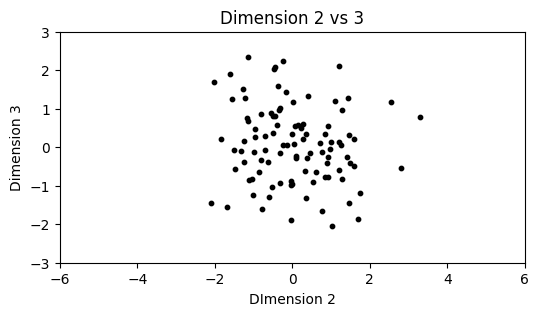

In [12]:
i = 2
j = 3
plt.figure(figsize=(6,3))
plt.scatter(X[:,i], X[:,j], s=10, c='k')
plt.axis([-6,6,-3,3])
plt.ylabel(f'Dimension {j}')
plt.xlabel(f'DImension {i}')
plt.title(f'Dimension {i} vs {j}')

plt.show()

*Use kmeans on the d = 100 dimensional data. Do we get the same results?*

99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592
99518.03165136592


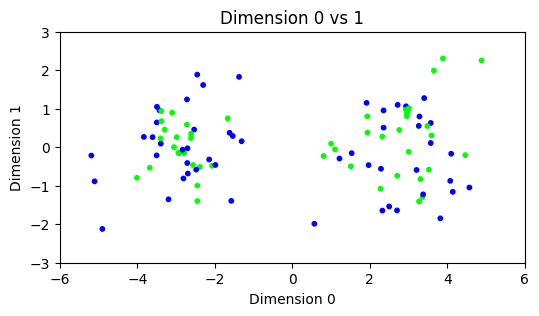

In [13]:
# What happens when we try to use kmeans on these columns?
assign = kmeans(rng, X, 2)

i = 0
j = 1
plt.figure(figsize=(6,3))
plt.scatter(X[:,i], X[:,j], s=10, c=assign, cmap='brg')
plt.axis([-6,6,-3,3])
plt.ylabel(f'Dimension {j}')
plt.xlabel(f'Dimension {i}')
plt.title(f'Dimension {i} vs {j}')


plt.show()

What happened? While the clusters are easy to tease apart if we know to look at the first coordinate only, in the full space the within-cluster and between-cluster distances become harder to distinguish: the noise overwhelms the signal.

As the dimension increases, the distributions of intra-cluster and inter-cluster distances overlap significantly and become more or less indistinguishable. That provides some insights into why clustering may fail here. Note that we used the same offset for all simulations. On the other hand, if the separation between the clusters is sufficiently large, one would expect clustering to work even in high dimension.

# What is the **Curse of Dimensionality**?
- **Curse of Dimensionality** refers to the phenomenon where the efficiency and effectiveness of algorithms deteriorate as the dimensionality of the data increases exponentially.

- In high-dimensional spaces, data points become sparse, making it challenging to discern meaningful patterns or relationships due to the vast amount of data required to adequately sample the space.

- Curse of Dimensionality significantly impacts machine learning algorithms in various ways. It leads to increased computational complexity, longer training times, and higher resource requirements. Moreover, it escalates the risk of overfitting and spurious correlations, hindering the algorithms' ability to generalize well to unseen data.

Techniques like dimensionality reduction, feature selection, and careful model design are essential for mitigating its effects and improving algorithm performance. Navigating this challenge is crucial for unlocking the potential of high-dimensional datasets and ensuring robust machine-learning solutions.

In [20]:
def gmm2spherical(rng, d, n, phi0, phi1, mu0, sig0, mu1, sig1):

    phi, mu, sig = np.stack((phi0, phi1)), np.stack((mu0, mu1)), np.stack((sig0,sig1))

    X = np.zeros((n,d))
    component = rng.choice(2, size=n, p=phi)
    for i in range(n):
        X[i,:] = spherical_gaussian(rng, d, 1, mu[component[i],:], sig[component[i]])

    return X, component

In [21]:
# Start with d = 2 (2 dimensions)
d, n, w = 15, 1000, 3
X, component = two_mixed_clusters(rng, d, n, w)


In [23]:
d, n, w = 2, 1000, 3
X, component = two_mixed_clusters(rng, d, n, w)


In [24]:
# What's component representing here?
print('Component shape:', component.shape)

print('Unique Values in Component:', np.unique(component))

component[:10]

Component shape: (1000,)
Unique Values in Component: [0 1]


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

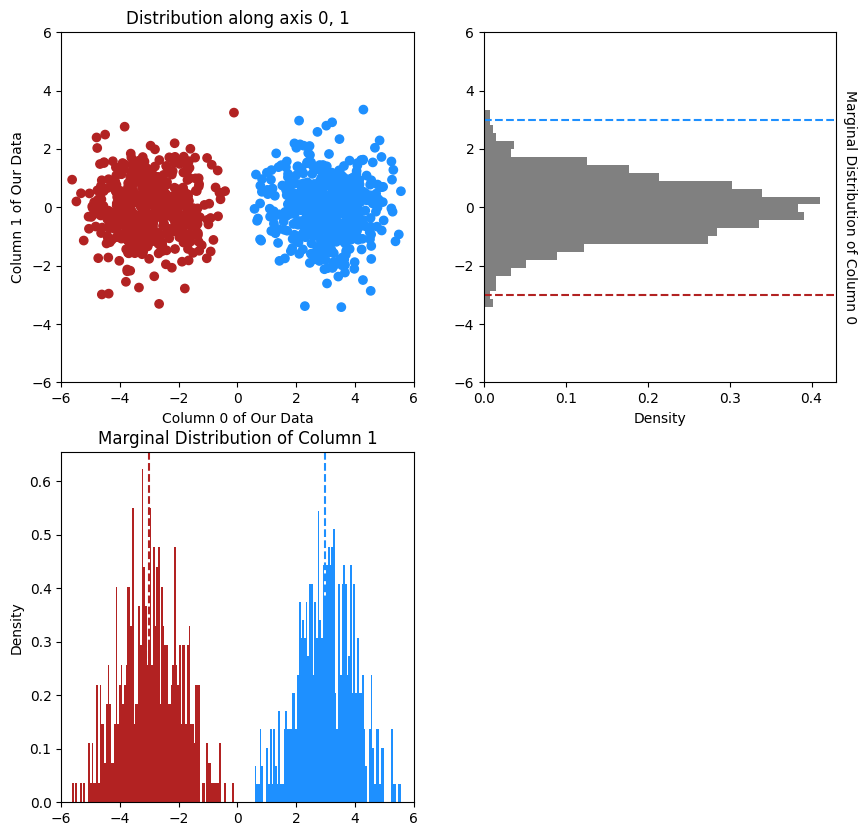

In [17]:
# Do not worry about reproducing this code ever. It's just an illustration!
i = 0
j = 1

xlim_scaler = 2

legend = {0: 'dodgerblue', 1: 'firebrick'}
colors = [legend[c] for c in component]

comp1 = np.argwhere(component == 0).flatten()
comp2 = np.argwhere(component == 1).flatten()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].scatter(X[:,i], X[:, j], color = colors)
ax[0,0].set_ylim(-xlim_scaler*w, xlim_scaler*w)
ax[0,0].set_xlim(-xlim_scaler*w, xlim_scaler*w)
ax[0, 0].set_title(f'Distribution along axis {i}, {j}')
ax[0, 0].set_xlabel(f'Column {i} of Our Data')
ax[0, 0].set_ylabel(f'Column {j} of Our Data')

ax[0, 1].hist(X[:, j], orientation = 'horizontal', density = True, bins = 25, color = 'grey') #sns.kdeplot(X[:, 1])
ax[0, 1].set_ylim(-xlim_scaler*w, xlim_scaler*w)
ax[0, 1].set_ylabel(f'Marginal Distribution of Column {i}', rotation = 270, labelpad=15)
ax[0, 1].set_xlabel(f'Density')
ax[0, 1].yaxis.set_label_position('right')


ax[1, 0].hist(X[comp1, i], density = True, bins = np.min([100, round(n / 10)]), color = 'dodgerblue')
ax[1, 0].hist(X[comp2, i], density = True, bins = np.min([100, round(n / 10)]), color = 'firebrick')
ax[1, 0].set_title(f'Marginal Distribution of Column {j}')
ax[1, 0].set_ylabel(f'Density')
ax[1,0].set_xlim(-xlim_scaler*w, xlim_scaler*w)

ax[0, 1].axhline(y = w, ls = '--', color = 'dodgerblue')
ax[0, 1].axhline(y = -w, ls = '--', color = 'firebrick')

ax[1, 0].axvline(x = w, ls = '--', color = 'dodgerblue')
ax[1, 0].axvline(x = -w, ls = '--', color = 'firebrick')

fig.delaxes(ax[1, 1])
fig.show()

In [18]:
import plotly.express as px
import plotly.graph_objects as go

In [19]:
### User Toggles
# Change the dimensions on the x,y,z axes
x, y, z = 0, 1, 2

# Toggle to change the color of the nodes
# from blue/red (True) vs grey (False)
know_answer = True

if know_answer:
  color_nodes = colors
else:
  color_nodes = ['grey'] * X.shape[0]


### Don't worry about code past this
background_color = '#ffffff'
title = ''

axis = dict(
    showbackground=True,
    showline=True,
    zeroline=True,
    showgrid=True,
    showticklabels=True,
    title='',
    backgroundcolor = background_color,
    gridcolor = '#10181F'
)

layout = go.Layout(
    title = title,
    width=1000,
    height=1000,
    scene=dict(
        xaxis=dict(axis),
        yaxis=dict(axis),
        zaxis=dict(axis),
    ),
    margin=dict(
        t=100
    ),
    hovermode='closest',
    paper_bgcolor = background_color,
    title_font_color = '#232D4B',
    title_font_family = 'Franklin Gothic',
    title_x=0.1,
    title_font_size = 50
)

# define node dictionaries
nodes=[dict(
    type='scatter3d',
    x=[X[k][x]],
    y=[X[k][y]],
    z=[X[k][z]],
    mode='markers',
    marker=dict(size=7, color= e),
    showlegend = False) for k, e in enumerate(color_nodes)]

fig = go.Figure(
    data = nodes,
    layout = layout
)

fig.update_layout(
    scene = dict(
        xaxis_title = f'Dimension {x}',
        yaxis_title = f'Dimension {y}',
        zaxis_title = f'Dimension {z}'
    )
)

fig

# Visual Proof of Chebyshev’s Inequality
### We can plot the frequency of landing in the inscribed d-ball B over number of dimensions and see that it rapidly converges to 0.

**Chebyshev's Inequality**:

$$P(|X - E[X]| \geq \alpha) \leq \frac{Var[X]}{\alpha^2} = (\frac{\sigma_X}{\alpha})^2$$

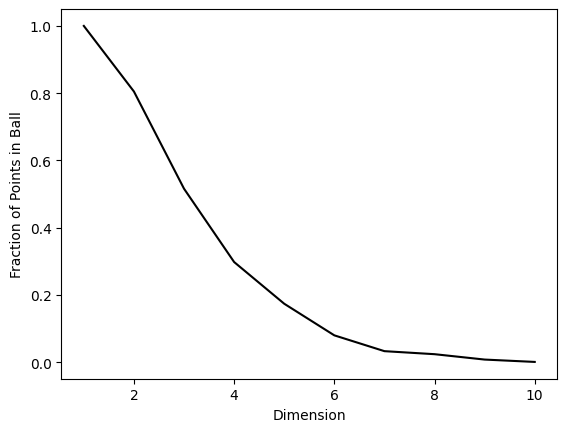

In [25]:
dmax, n = 10, 1000

in_ball = np.zeros(dmax)
for d in range(dmax):
  in_ball[d] = np.mean([(LA.norm(rng.random(d+1) - 1/2) < 1/2) for _ in range(n)])

plt.plot(np.arange(1,dmax+1), in_ball, c='k')
plt.xlabel('Dimension')
plt.ylabel('Fraction of Points in Ball')
plt.show()

# What is a function and how to use it

- Why are functions useful?
- What is parameter? Optional vs Required
- What are default values for parameters?
- Why is it important that parameters have type restraints? (input '1' vs 1)
- Printing something within a function vs returning a value from a function
- If/Elif/Else statements
- What are f-strings?
- How to handle returning multiple values from a function (or returning a list or tuple)?
    - What if you only want one of the values?
    - Does order matter?

In [26]:
# Define a function that performs basic math operations
def basic_math_operations(a, b, operation="add", return_absolute=False):
    """
    Performs a basic mathematical operation on two numbers.

    Parameters:
    a (float): Required. The first number.
    b (float): Required. The second number.
    operation (str, optional): The mathematical operation to perform. Options: "add", "multiply", "divide". Default is "add".
    return_absolute (bool, optional): If True, returns the absolute value of the result. Default is False.

    Returns:
    tuple:
        - result (float or str): The computed result, or an error message if division by zero occurs.
        - operation_used (str): The operation that was performed.
    """

    # Perform the selected operation
    if operation == "add":
        result = a + b
    elif operation == "multiply":
        result = a * b
    elif operation == "divide":
        # Handle division by zero
        result = a / b if b != 0 else "Error: Division by zero"
    else:
        return "Error: Invalid operation", operation  # Return an error if an invalid operation is passed

    # Convert result to absolute value if requested
    if return_absolute and isinstance(result, (int, float)):
        result = abs(result)

    return result, operation

# Example Usage

# Performing addition (default)
res1, op1 = basic_math_operations(5, 3)
print(f"Operation: {op1}, Result: {res1}")

# Performing multiplication
res3, op3 = basic_math_operations(-4, 6, operation="multiply")
print(f"Operation: {op3}, Result: {res3}")

# Performing division
res4, op4 = basic_math_operations(8, 2, operation="divide")
print(f"Operation: {op4}, Result: {res4}")

# Handling division by zero
res5, op5 = basic_math_operations(5, 0, operation="divide")
print(f"Operation: {op5}, Result: {res5}")

# Returning absolute value of a negative result
res6, op6 = basic_math_operations(3, 10, operation="subtract", return_absolute=True)
print(f"Operation: {op6}, Result: {res6} (absolute value)")

Operation: add, Result: 8
Operation: multiply, Result: -24
Operation: divide, Result: 4.0
Operation: divide, Result: Error: Division by zero
Operation: subtract, Result: Error: Invalid operation (absolute value)


In [27]:
# How do we use the output?:


# Previous example - Performing addition (default)
res1, op1 = basic_math_operations(5, 3)
# the last line of the basic_math_operations function: return result, operation
print(res1) #result
print(op1) #operation

# The below code is incorrect for our use-case - it returns a tuple with 2 values inside but we want to use each value within the tuple separately
res2 = basic_math_operations(5, 3)
print(res2)

# In the first addition example, you are assigning each value returned from the function to a new variable (res1, op1)
# This means that (var1, var2) takes on the values of (8, 'add') respectively

8
add
(8, 'add')


#### **Question:** Please edit the above function to add an option to subtract two numbers. Test that it works by printing only the resulting value (not the operation).

In [39]:
# Please edit the above function to add an option to subtract two numbers
# Test that it works by printing only the resulting value (not the operation)
def basic_math_operations(a, b, operation="add",return_absolute=False):
    if operation == "add":
        result = a + b
    elif operation == "subtract":
        result = a - b
    else:
        raise ValueError("Invalid operation. Choose 'add' or 'subtract'.")
    return result, operation
    if return_absolute and isinstance(result, (int, float)):
        result = abs(result)

res1, _ = basic_math_operations(5, 3, "subtract")
print(res1)

2
